# 📌 Introduction  

The COVID-19 pandemic has been one of the most significant global health crises in recent history.  
In this project, we analyze global COVID-19 data to:  

- Understand worldwide trends in confirmed cases and deaths.  
- Identify the countries most affected.  
- Compare the progression of the pandemic in the **US, India, and Brazil**.  
- Visualize **pandemic waves** using 7-day rolling averages.  

The analysis follows the **Ask–Prepare–Process–Analyze–Share** framework from the *Google Data Analytics Capstone*.  

---

# 🔹 1. Ask  

**Business Task:**  
To analyze global COVID-19 data and provide insights into infection and death trends worldwide, focusing on key countries.  

**Stakeholders:**  
- Health policy makers  
- Public health researchers  
- General public interested in pandemic insights  

---

# 🔹 2. Prepare  

We use the **COVID-19 cleaned dataset** available on Kaggle:  
[Corona Virus Report Dataset (Kaggle)](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)  

This dataset contains daily updates of COVID-19 cases with the following fields:  

- **Date** – reporting date  
- **Country/Region** – country where cases are reported  
- **Confirmed** – cumulative confirmed cases  
- **Deaths** – cumulative deaths  
- **Recovered** – cumulative recovered cases

In [1]:
# Install and load required libraries
# Remove the hash below for the first time
install.packages("tidyverse")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("zoo")

library(tidyverse)
library(lubridate)
library(ggplot2)
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘lubridate’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘ggplot2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘zoo’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
# Load dataset
covid_df <- read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv")

# Quick overview
glimpse(covid_df)

summary(covid_df)

colnames(covid_df)

Rows: 49068 Columns: 10


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Province/State, Country/Region, WHO Region
dbl  (6): Lat, Long, Confirmed, Deaths, Recovered, Active
date (1): Date



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 49,068
Columns: 10
$ `Province/State` <chr> NA, NA, NA, NA, NA, NA, NA, NA, "Australian Capital T…
$ `Country/Region` <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Ango…
$ Lat              <dbl> 33.93911, 41.15330, 28.03390, 42.50630, -11.20270, 17…
$ Long             <dbl> 67.709953, 20.168300, 1.659600, 1.521800, 17.873900, …
$ Date             <date> 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22, 2020…
$ Confirmed        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Deaths           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Recovered        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Active           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `WHO Region`     <chr> "Eastern Mediterranean", "Europe", "Africa", "Europe"…


 Province/State     Country/Region          Lat               Long        
 Length:49068       Length:49068       Min.   :-51.796   Min.   :-135.00  
 Class :character   Class :character   1st Qu.:  7.873   1st Qu.: -15.31  
 Mode  :character   Mode  :character   Median : 23.634   Median :  21.75  
                                       Mean   : 21.434   Mean   :  23.53  
                                       3rd Qu.: 41.204   3rd Qu.:  80.77  
                                       Max.   : 71.707   Max.   : 178.06  
      Date              Confirmed           Deaths           Recovered      
 Min.   :2020-01-22   Min.   :      0   Min.   :     0.0   Min.   :      0  
 1st Qu.:2020-03-08   1st Qu.:      4   1st Qu.:     0.0   1st Qu.:      0  
 Median :2020-04-24   Median :    168   Median :     2.0   Median :     29  
 Mean   :2020-04-24   Mean   :  16885   Mean   :   884.2   Mean   :   7916  
 3rd Qu.:2020-06-10   3rd Qu.:   1518   3rd Qu.:    30.0   3rd Qu.:    666  
 Max.   :2020

[1] "Province/State" "Country/Region" "Lat"            "Long"          
 [5] "Date"           "Confirmed"      "Deaths"         "Recovered"     
 [9] "Active"         "WHO Region"

# 🔹 3. Process  

Before analyzing, we need to clean and transform the dataset:  

- **Rename columns** for consistency  
- **Convert date** column into proper `Date` format  
- **Filter** data starting from March 11, 2020 (the day WHO declared COVID-19 a pandemic)  
- **Create new variable**: `Active Cases = Confirmed – Deaths – Recovered`  

In [3]:
covid_processed <- covid_df %>% 
  rename(Country=`Country/Region`, Date=`Date`) %>% 
  mutate(Date=ymd(Date)) %>% 
  filter(Date >= as.Date("2020-03-11")) %>% 
  mutate(Active = Confirmed - Deaths - Recovered)

head(covid_processed)

Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NA,Afghanistan,33.93911,67.70995,2020-03-11,7,0,0,7,Eastern Mediterranean
NA,Albania,41.15330,20.16830,2020-03-11,12,1,0,11,Europe
NA,Algeria,28.03390,1.65960,2020-03-11,20,0,0,20,Africa
NA,Andorra,42.50630,1.52180,2020-03-11,1,0,0,1,Europe
NA,Angola,-11.20270,17.87390,2020-03-11,0,0,0,0,Africa
NA,Antigua and Barbuda,17.06080,-61.79640,2020-03-11,0,0,0,0,Americas


# 🔹 4. Analyze  

## 🌍 Global Trends in Confirmed Cases  

To understand how the pandemic evolved globally, we first aggregate the total confirmed cases across all countries by date. This helps visualize the growth of the pandemic over time and identify key inflection points.  


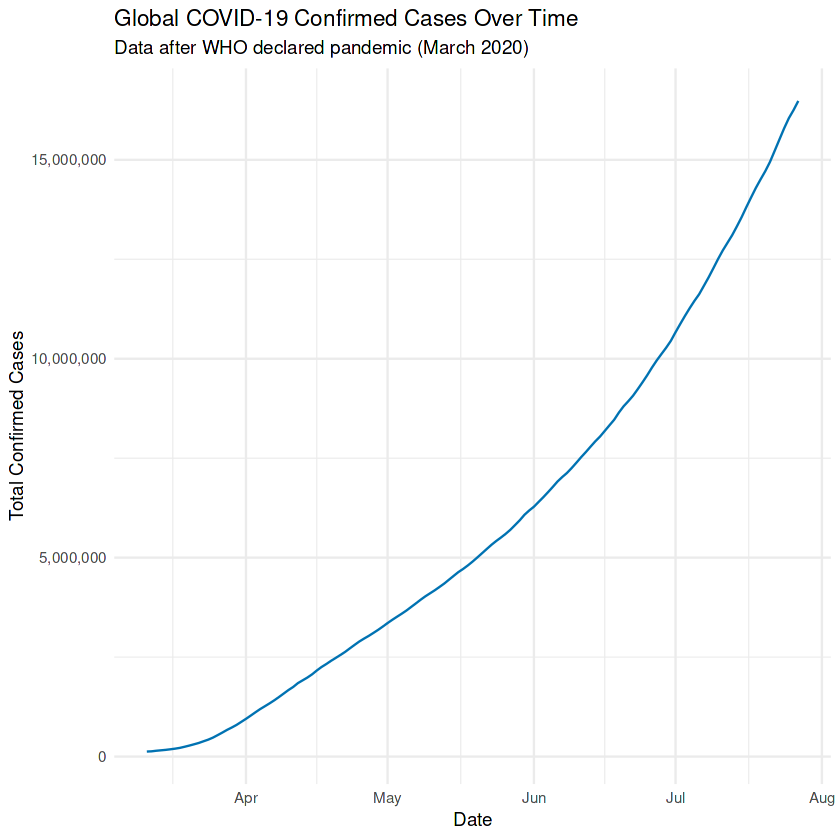

In [4]:
global_summary <- covid_processed %>% 
  group_by(Date) %>% 
  summarise(Total_Confirmed = sum(Confirmed, na.rm = TRUE))

ggplot(global_summary, aes(x=Date, y=Total_Confirmed)) +
  geom_line(color='#0072B2') +
  scale_y_continuous(labels = scales::comma) +
  labs(title="Global COVID-19 Confirmed Cases Over Time",
       subtitle="Data after WHO declared pandemic (March 2020)",
       x="Date", y="Total Confirmed Cases") +
  theme_minimal()

## 🌍 Top 10 Countries by Total Confirmed Cases

To understand which countries were most impacted by COVID-19, we calculate the total cumulative confirmed cases for each country. By ranking countries based on their highest reported confirmed cases, we can identify the regions with the heaviest burden of infections. This information is crucial for policymakers, researchers, and public health authorities to **prioritize resources and interventions**. 

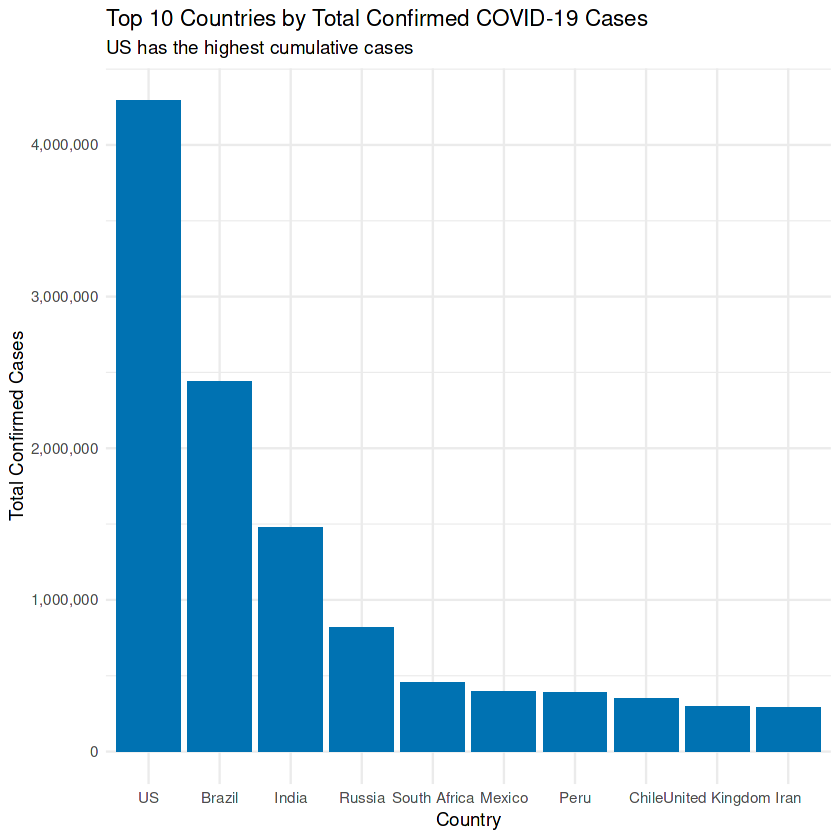

In [5]:
# Summarize total confirmed cases by country
country_summary <- covid_processed %>% 
  group_by(Country) %>% 
  summarise(Total_Confirmed = max(Confirmed, na.rm=TRUE)) %>% 
  arrange(desc(Total_Confirmed))

# Select top 10 countries
Top_10_countries <- head(country_summary,10)

# Plot top 10 countries by confirmed cases
ggplot(Top_10_countries, aes(x=reorder(Country, -Total_Confirmed), y=Total_Confirmed)) +
  geom_col(fill="#0072B2") +
  scale_y_continuous(labels = scales::comma) +
  labs(title="Top 10 Countries by Total Confirmed COVID-19 Cases",
       subtitle="US has the highest cumulative cases",
       x="Country", y="Total Confirmed Cases") +
  theme_minimal()

## 📊 Country Comparison: US, India, Brazil

To better understand how COVID-19 evolved across the most affected countries, we compare the cumulative confirmed cases over time for the **United States, India, and Brazil**. This comparison highlights differences in pandemic progression, outbreak intensity, and recovery trends among major hotspots.

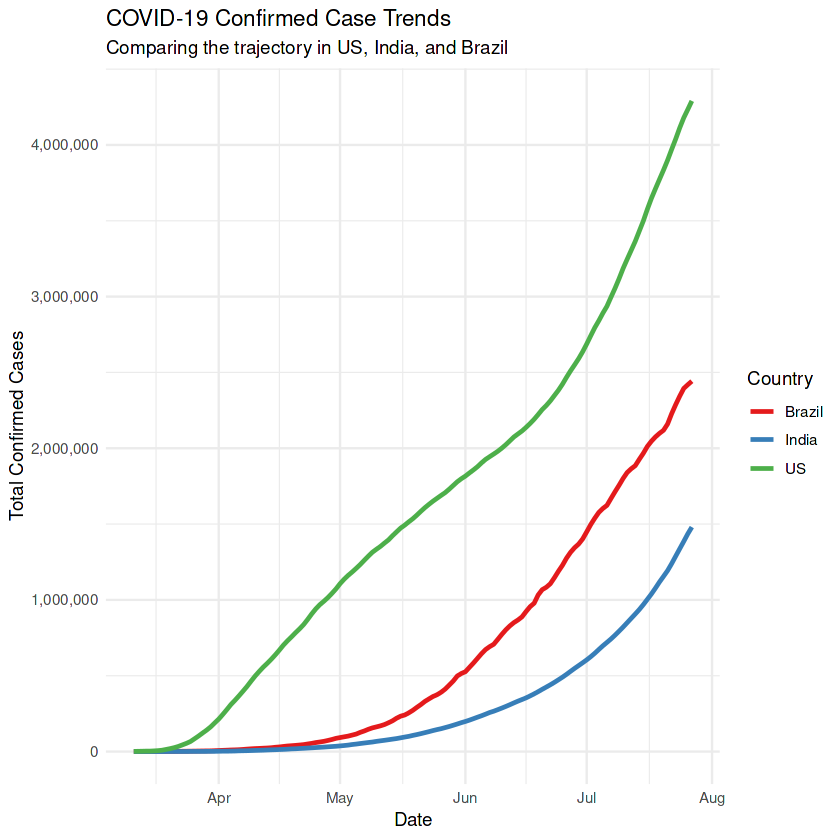

In [6]:
# Define countries for comparison
Countries_to_compare <- c("US","Brazil","India")

# Filter dataset for selected countries
country_trends_df <- covid_processed %>% 
  filter(Country %in% Countries_to_compare)

# Plot cumulative confirmed cases over time
ggplot(country_trends_df, aes(x=Date, y=Confirmed, color=Country)) +
  geom_line(linewidth=1) +
  scale_y_continuous(labels = scales::comma) +
  scale_color_brewer(palette="Set1") +
  labs(title="COVID-19 Confirmed Case Trends",
       subtitle="Comparing the trajectory in US, India, and Brazil",
       x="Date", y="Total Confirmed Cases", color="Country") +
  theme_minimal()

## 📈 Pandemic Waves: Daily New Cases (7-Day Average)

To better understand the dynamics of COVID-19 outbreaks, we analyze **daily new cases** using a **7-day rolling average**. This approach smooths short-term fluctuations, allowing us to clearly visualize **infection waves** and compare their intensity and timing across countries.

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_line()`).”


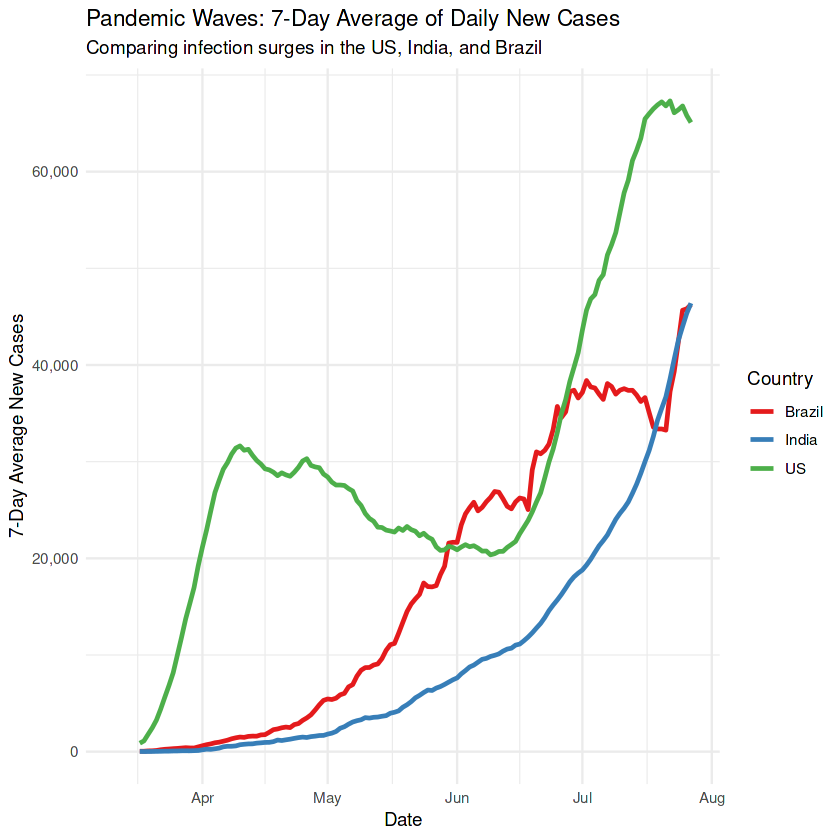

In [7]:
# Calculate daily new cases and 7-day rolling average
daily_cases_df <- covid_processed %>% 
  group_by(Country) %>% 
  arrange(Date) %>% 
  mutate(Daily_Cases = Confirmed - lag(Confirmed, default=0),
         Daily_Cases_Avg = rollmean(Daily_Cases, k=7, fill=NA, align="right")) %>% 
  ungroup()

# Filter for selected countries
daily_waves_plot_df <- daily_cases_df %>% 
  filter(Country %in% Countries_to_compare)

# Plot 7-day rolling average of daily new cases
ggplot(daily_waves_plot_df, aes(x=Date, y=Daily_Cases_Avg, color=Country)) +
  geom_line(linewidth=1) +
  scale_y_continuous(labels = scales::comma) +
  scale_color_brewer(palette="Set1") +
  labs(title="Pandemic Waves: 7-Day Average of Daily New Cases",
       subtitle="Comparing infection surges in the US, India, and Brazil",
       x="Date", y="7-Day Average New Cases", color="Country") +
  theme_minimal()

## ⚰️ Top 10 Countries by Total Deaths

Understanding the **mortality impact** of COVID-19 is crucial for evaluating the severity of the pandemic. Here, we summarize the **total deaths by country** to identify which regions experienced the highest fatality burden. This analysis helps highlight **healthcare system challenges** and the effectiveness of mitigation measures across different countries.


In [1]:
# Summarize total deaths by country
country_deaths_summary <- covid_processed %>% 
  group_by(Country) %>% 
  summarise(Total_Deaths = max(Deaths, na.rm=TRUE)) %>% 
  arrange(desc(Total_Deaths))

# Select top 10 countries by deaths
Top_10_deaths <- head(country_deaths_summary,10)

# Plot top 10 countries by total deaths
ggplot(Top_10_deaths, aes(x=reorder(Country,-Total_Deaths), y=Total_Deaths)) +
  geom_col(fill="#D55E00") +
  scale_y_continuous(labels = scales::comma) +
  labs(title="Top 10 Countries by Total COVID-19 Deaths",
       subtitle="Absolute number of deaths across countries",
       x="Country", y="Total Deaths") +
  theme_minimal()

SyntaxError: invalid syntax (2605165808.py, line 2)

## 🔹 5. Share & Act

After analyzing global trends, country-specific case counts, pandemic waves, and mortality, we summarize the **key findings** and provide actionable recommendations for public health planning.

### ✅ Key Findings
- COVID-19 spread in **multiple waves** globally, with the **US, India, and Brazil** being the most affected countries.  
- **India’s Delta wave (2021)** represented one of the most severe infection surges worldwide, emphasizing the impact of viral variants.  
- Smaller countries such as **Peru and Mexico** faced disproportionately high per-capita death rates, highlighting **vulnerabilities in healthcare infrastructure and pandemic preparedness**.

### 📢 Recommendations
- Governments should monitor **7-day rolling averages of new cases** to detect emerging waves early and respond proactively.  
- **Comparative country analysis** can help anticipate outbreaks, allocate resources efficiently, and implement targeted interventions.  
- Strengthening **vaccine distribution**, healthcare capacity, and preparedness plans is critical to mitigating the impact of future pandemics.  

### 📌 Conclusion
This analysis provides a **comprehensive view of COVID-19’s global progression**, highlighting its scale, timing, and impact.  
The data-driven insights can assist **health researchers, policymakers, and public health agencies** in planning effective interventions, improving resource allocation, and preparing for future infectious disease outbreaks.

## 📚 References

1. **Dataset:** [COVID-19 Dataset on Kaggle](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)  
   - Source of the cleaned and structured COVID-19 data used for this analysis.  

2. **Pandemic Declaration:** [World Health Organization (WHO) – COVID-19 Pandemic Announcement](https://www.who.int/news/item/11-03-2020-who-characterizes-covid-19-as-a-pandemic)  
   - Reference for the official date when COVID-19 was declared a global pandemic (March 11, 2020).  

3. **Data Analysis & Visualization:**  
   - **R Packages:** tidyverse, lubridate, ggplot2, zoo  
   - Used for data cleaning, transformation, and visualization throughout this report.  

4. **Additional Resources:**  
   - WHO COVID-19 Dashboard: [https://covid19.who.int/](https://covid19.who.int/)  
   - General pandemic information, trends, and statistics.